In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
data = scipy.io.loadmat("data_hw6_cs189_fa16/mnist_data/images.mat")
Images = data['images'].astype(int)
img_reshape = Images.transpose(2,0,1).reshape(60000,-1)
print(Images.shape, img_reshape.shape)

(28, 28, 60000) (60000, 784)


In [3]:
X = img_reshape

In [4]:
def has_converged(old_centers, new_centers, epsilon):
    """
    Test if the distance between the centers is less than epsilon.
    """
    return (old_centers is not None) and (new_centers is not None) and \
        np.linalg.norm(np.asarray(old_centers) - np.asarray(new_centers), ord=2) < epsilon

In [5]:
def nearest_center(centers, point):
    """
    Outputs:
    A 2-tuple, containing the index of the closest center (point) and its distance from point
    """
    (index, shortest_distance) = (None, 999999)
    for idx in range(len(centers)):
        center = centers[idx]
        distance = np.linalg.norm(np.array(center)- np.array(point))
        if distance < shortest_distance:
            (index, shortest_distance) = (idx, distance)                                  
    return index

In [6]:
def update_center(points, old_centers):
    """
    Output:
    A 2-tuple (counts, sums) consisting of:
     - counts: an array of length k containing the count of points in each new center
     - sums: a k by d array consisting of sum of the points assigned to each center
     
    """
    # Get the shape of the old centers
    
#     k,d = old_centers.shape
    k = len(old_centers)
    d = len(old_centers[0])
    # Initialize the sums
    counts = np.zeros((k,1))
    sums = np.zeros((k,d))

    # Loop over the data and compute the new assignments
    for i in range(points.shape[0]):
        # Compute the nearest center
        point = points[i]
        nearest_c = nearest_center(old_centers,point)
        # Update the sums and counts
        counts[nearest_c] += 1
        sums[nearest_c] += point
  
    return (counts, sums)

In [7]:
def k_means(X, k = 5, max_iter = 1000, epsilon = 0.001):
    # Pick initial cluster centers
    centers = []
    init_idx = np.random.choice(X.shape[0], k, replace=False)
    for idx in init_idx:
        centers.append(X[idx])
    
    # Main loop 
    old_centers = None
    new_centers = centers
    num_iter = 0
    while num_iter < max_iter and not has_converged(old_centers, new_centers, epsilon):
        old_centers = new_centers
#         print(old_centers)
        count, sums = update_center(X, old_centers)
        new_centers = sums/count
        num_iter += 1
        
    return new_centers


## K = 5

In [8]:
k = 5 
M = k_means(X, k = k, max_iter = 200)

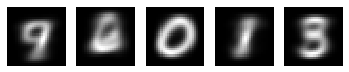

In [9]:
for i in range(len(M)):
    plt.subplot(1, len(M), (i + 1))
    plt.imshow(M[i].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.xticks(()), plt.yticks(())
plt.show()

In [10]:
def make_plot(M):
    for i in range(len(M)):
        plt.subplot(1, len(M), (i + 1))
        plt.imshow(M[i].reshape((28,28)), interpolation='nearest', cmap='gray')
        plt.xticks(()), plt.yticks(())
    plt.show()

## K = 10

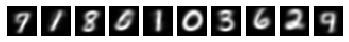

In [11]:
k = 10
M = k_means(X, k = k, max_iter = 200)
make_plot(M)

## K = 20

In [12]:
k = 20
M = k_means(X, k = k, max_iter = 200)
make_plot(M)